## Spatially structured networks¶
* https://nest-simulator.readthedocs.io/en/latest/tutorials/pynest_tutorial/part_4_spatially_structured_networks.html#pynest-tutorial-4

In [44]:
import nest
import numpy as np


### Basic structure
```python
positions = ...  # See below for how to define positions
s_nodes = nest.Create(node_model, positions=positions)
```

In [45]:
positions = nest.spatial.grid(shape=[10, 10],  # the number of rows and column in this grid ...
                              extent=[2., 2.]  # the size of the grid in mm
                              )
grid = nest.Create('iaf_psc_alpha', positions=positions)

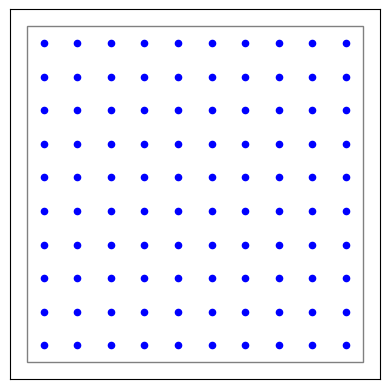

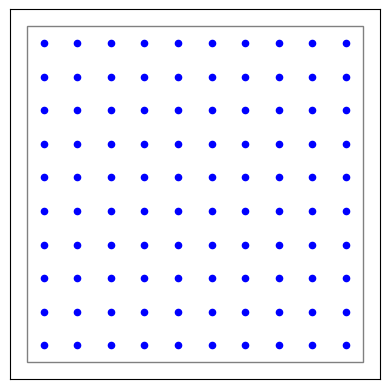

In [46]:
nest.PlotLayer(grid)

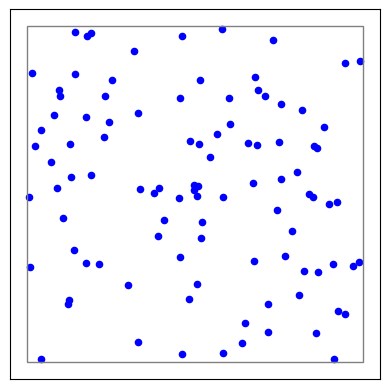

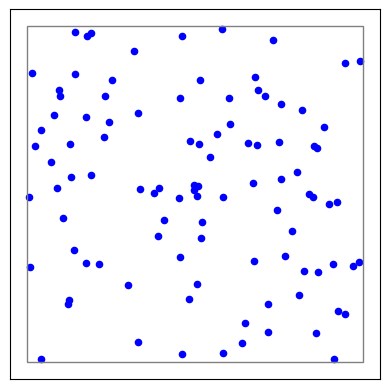

In [47]:
positions_free = nest.spatial.free(
    nest.random.uniform(min=-0.5, max=0.5),  # using random positions in a uniform distribution
    num_dimensions=2  # have to specify number of dimensions
)
s_nodes = nest.Create('iaf_psc_alpha', 100, positions=positions_free)
nest.PlotLayer(s_nodes)

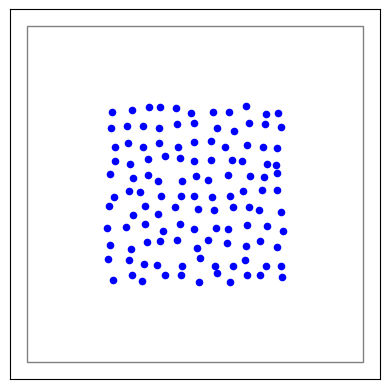

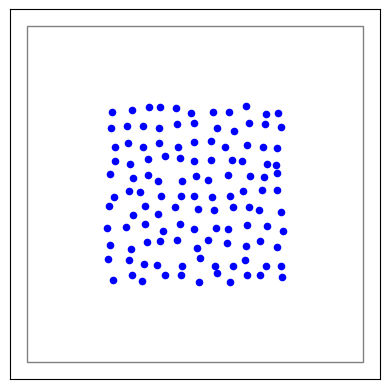

In [48]:
xs = np.arange(-0.5, 0.501, 0.1)
poss = [[x, y] for y in xs for x in xs] # for grid positions
poss = [[p[0] + np.random.uniform(-0.03, 0.03), p[1] + np.random.uniform(-0.03, 0.03)] for p in poss] # add some noise

positions = nest.spatial.free(poss)
s_nodes = nest.Create('iaf_psc_alpha', positions=positions)
nest.PlotLayer(s_nodes)

### Defining connection profiles

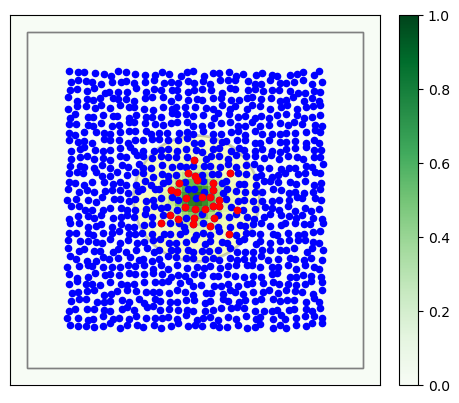

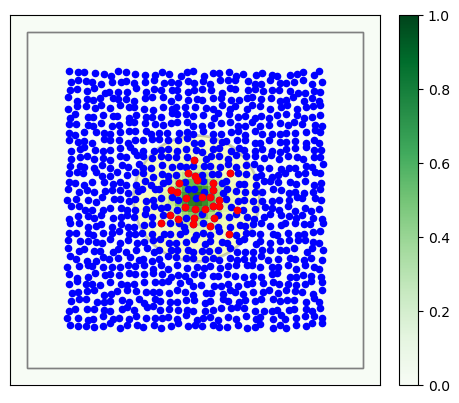

In [49]:
nest.ResetKernel()
xs = np.arange(-1.5, 1.501, 0.1)
poss = [[x, y] for y in xs for x in xs] # for grid positions
poss = [[p[0] + np.random.uniform(-0.03, 0.03), p[1] + np.random.uniform(-0.03, 0.03)] for p in poss] # add some noise

positions = nest.spatial.free(poss)
s_nodes = nest.Create('iaf_psc_alpha', positions=positions)
# Circular mask, distance-dependent connection probability with gaussian distribution
conn1 = {'rule': 'pairwise_bernoulli',
         'p': nest.spatial_distributions.gaussian(nest.spatial.distance, std=0.2),
         'mask': {'circular': {'radius': 0.75}},
         'allow_autapses': False
}
nest.Connect(s_nodes, s_nodes, conn1)
fig = nest.PlotLayer(s_nodes)
ctr = nest.FindCenterElement(s_nodes)
nest.PlotTargets(ctr, s_nodes, fig=fig, 
                 mask=conn1['mask'],
                 probability_parameter=conn1['p'],
                 tgt_color='red', 
                 probability_cmap="Greens")


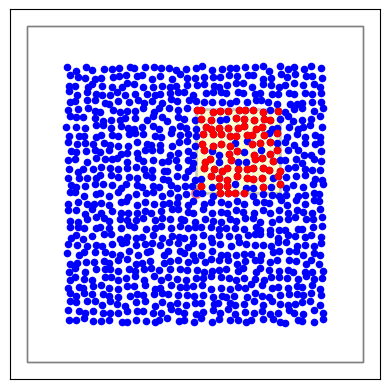

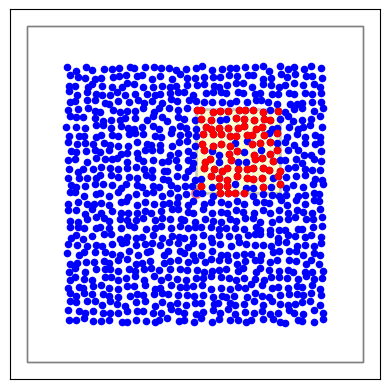

In [50]:
nest.ResetKernel()
xs = np.arange(-1.5, 1.501, 0.1)
poss = [[x, y] for y in xs for x in xs] # for grid positions
poss = [[p[0] + np.random.uniform(-0.03, 0.03), p[1] + np.random.uniform(-0.03, 0.03)] for p in poss] # add some noise

positions = nest.spatial.free(poss)
s_nodes = nest.Create('iaf_psc_alpha', positions=positions)
# Rectangular mask with non-centered anchor, constant connection probability
conn2 = {'rule': 'pairwise_bernoulli',
         'p': 0.75,
         'mask': {'rectangular': {'lower_left': [-0.5, -0.5], 'upper_right': [0.5, 0.5]},
                 'anchor': [0.5, 0.5]}, # the center of the mask, default is [0, 0] see below
         'allow_autapses': False
         }
nest.Connect(s_nodes, s_nodes, conn2)
fig = nest.PlotLayer(s_nodes)
ctr = nest.FindCenterElement(s_nodes)
nest.PlotTargets(ctr, s_nodes, fig=fig, 
                 mask=conn2['mask'],
                 #probability_parameter=conn2['p'],
                 tgt_color='red', 
                 probability_cmap="Greens")

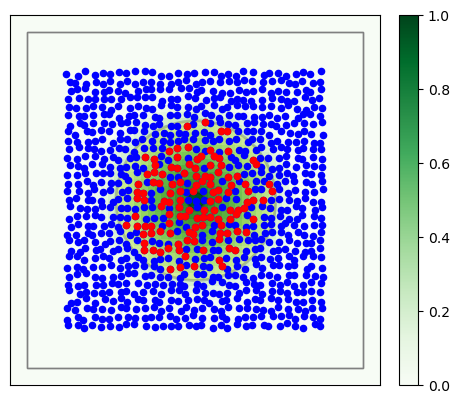

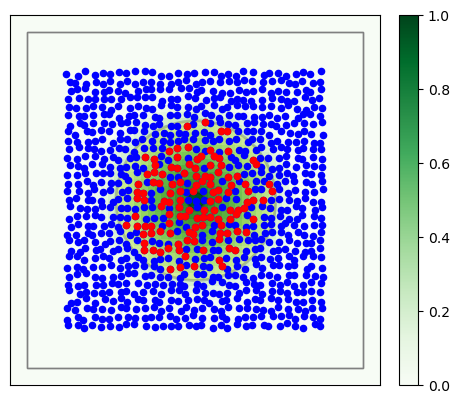

In [51]:
nest.ResetKernel()
xs = np.arange(-1.5, 1.501, 0.1)
poss = [[x, y] for y in xs for x in xs] # for grid positions
poss = [[p[0] + np.random.uniform(-0.03, 0.03), p[1] + np.random.uniform(-0.03, 0.03)] for p in poss] # add some noise

positions = nest.spatial.free(poss)
s_nodes = nest.Create('iaf_psc_alpha', positions=positions)
# Donut mask, linear distance-dependent connection probability
conn3 = {'rule': 'pairwise_bernoulli',
         'p': 1.0 - 0.8 * nest.spatial.distance,
         'mask': {'doughnut': {'inner_radius': 0.1, 'outer_radius': 0.95}},
         }
nest.Connect(s_nodes, s_nodes, conn3)
fig = nest.PlotLayer(s_nodes)
ctr = nest.FindCenterElement(s_nodes)
nest.PlotTargets(ctr, s_nodes, fig=fig, 
                 mask=conn3['mask'],
                 probability_parameter=conn3['p'],
                 tgt_color='red', 
                 probability_cmap="Greens")


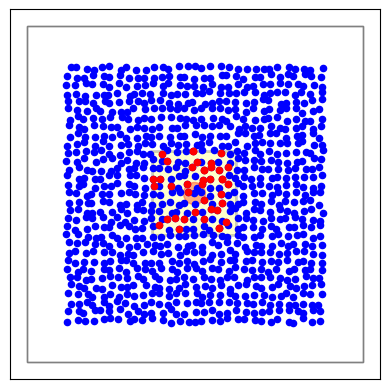

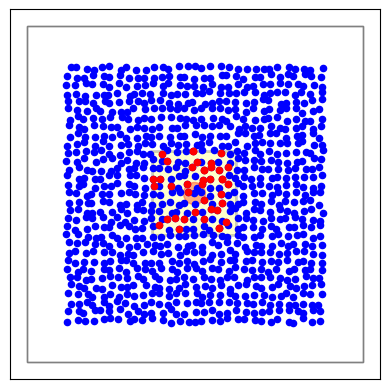

In [52]:
nest.ResetKernel()
xs = np.arange(-1.5, 1.501, 0.1)
poss = [[x, y] for y in xs for x in xs] # for grid positions
poss = [[p[0] + np.random.uniform(-0.03, 0.03), p[1] + np.random.uniform(-0.03, 0.03)] for p in poss] # add some noise

positions = nest.spatial.free(poss)
s_nodes = nest.Create('iaf_psc_alpha', positions=positions)
# Rectangular mask, fixed outdegree, distance-dependent weights from a gaussian distribution,
# distance-dependent delays
conn4 = {'rule': 'fixed_outdegree',
         'outdegree': 40,
         'mask': {'rectangular': {'lower_left': [-0.5, -0.5], 'upper_right': [0.5, 0.5]}},
   'allow_autapses': False,}
syn_4 = {"weight": nest.spatial_distributions.gaussian(
             nest.spatial.distance, std=0.25),
          'delay': 0.1 + 0.2 * nest.spatial.distance,   }
nest.Connect(s_nodes, s_nodes, conn4, syn_4)
fig = nest.PlotLayer(s_nodes)
ctr = nest.FindCenterElement(s_nodes)
nest.PlotTargets(ctr, s_nodes, fig=fig, 
                 mask=conn4['mask'],
                 tgt_color='red', 
                 src_size = 250, 
                 )

In [53]:
help(nest.PlotTargets)

Help on function PlotTargets in module nest.lib.hl_api_spatial:

PlotTargets(src_nrn, tgt_layer, syn_type=None, fig=None, mask=None, probability_parameter=None, src_color='red', src_size=50, tgt_color='blue', tgt_size=20, mask_color='yellow', probability_cmap='Greens')
    Plot all targets of source neuron `src_nrn` in a target layer `tgt_layer`.

    Parameters
    ----------
    src_nrn : NodeCollection
        `NodeCollection` of source neuron (as single-element NodeCollection)
    tgt_layer : NodeCollection
        `NodeCollection` of tgt_layer
    syn_type : [None | str], optional, default: None
        Show only targets connected with a given synapse type
    fig : [None | matplotlib.figure.Figure object], optional, default: None
        Matplotlib figure to plot to. If not given, a new figure is created.
    mask : [None | dict], optional, default: None
        Draw mask with targets; see :py:func:`.PlotProbabilityParameter` for details.
    probability_parameter : [None | Param

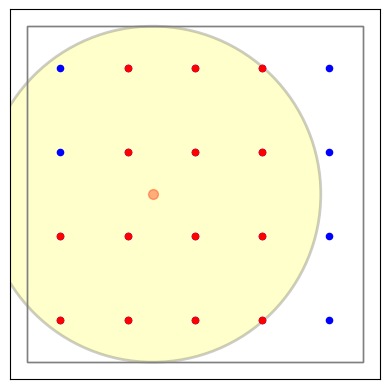

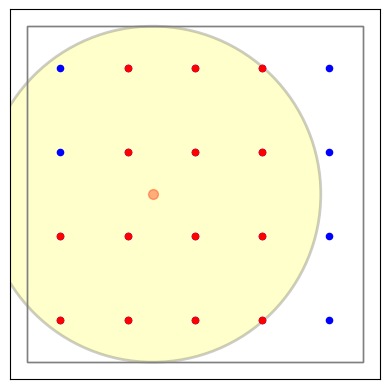

In [54]:
nest.ResetKernel()

ex_pop = nest.Create('iaf_psc_alpha', positions=nest.spatial.grid(shape=[4,5]))
in_pop = nest.Create('iaf_psc_alpha', positions=nest.spatial.grid(shape=[5,4]))
conn_dict_ex = {'rule': 'pairwise_bernoulli',
                'p': .7,
                'mask': {'circular': {'radius': 0.5}},
                #'allow_autapses': False
                }
conn_dict_in = {'rule': 'pairwise_bernoulli',
                'p': .7,
                'mask': {'circular': {'radius': 0.75}},
                #'allow_autapses': False
                }
nest.Connect(ex_pop, in_pop, conn_dict_ex)
nest.Connect(in_pop, ex_pop, conn_dict_in)
nest.Connect(ex_pop, ex_pop, conn_dict_ex)
nest.Connect(in_pop, in_pop, conn_dict_in)

fig = nest.PlotLayer(in_pop)
ctr = nest.FindCenterElement(ex_pop)
nest.PlotTargets(ctr, in_pop, fig=fig, 
                 mask=conn_dict_ex['mask'],
                 #probability_parameter=conn_dict_ex['p'],
                 tgt_color='red', 
                 probability_cmap="Greens")

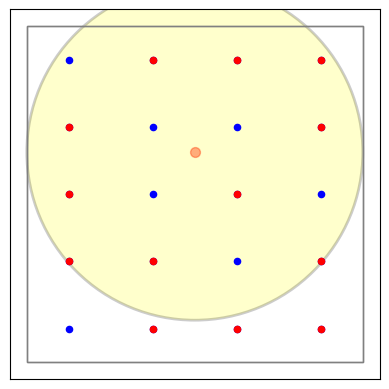

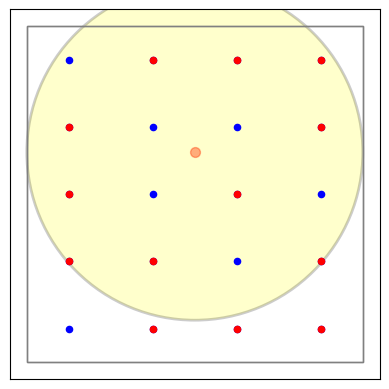

In [55]:
fig = nest.PlotLayer(ex_pop)
ctr = nest.FindCenterElement(in_pop)
nest.PlotTargets(ctr, ex_pop, fig=fig, 
                 mask=conn_dict_ex['mask'],
                 #probability_parameter=conn_dict_ex['p'],
                 tgt_color='red', 
                 probability_cmap="Greens")

In [56]:
ex_pop.spatial

{'center': (0.0, 0.0),
 'edge_wrap': False,
 'extent': (1.0, 1.0),
 'network_size': 20,
 'shape': (4, 5)}

In [57]:
in_pop.spatial

{'center': (0.0, 0.0),
 'edge_wrap': False,
 'extent': (1.0, 1.0),
 'network_size': 20,
 'shape': (5, 4)}